# Домашнее задание №3

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица Indian liver pations records.

In [13]:
url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv(url)
data.head(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


Columns:

*  Age of the patient
*  Gender of the patient
*  Total Bilirubin
*  Direct Bilirubin
*  Alkaline Phosphotase
*  Alamine Aminotransferase
*  Aspartate Aminotransferase
*  Total Protiens
*  Albumin
*  Albumin and Globulin Ratio
*  Dataset: field used to split the data into two sets (patient with liver disease, or no disease)


Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin. Построить график. Строим прямую с помощью уравнения которое мы посчитали. Предсказать несколько элементов из таблицы с помощью метода predict() и сравнить с результатом табличным.

In [4]:
from sklearn.linear_model import LinearRegression
Direct_Bilirubin = data['Direct_Bilirubin']
Total_Bilirubin = data['Total_Bilirubin']
model = LinearRegression()
result = model.fit(np.array(Direct_Bilirubin).reshape(-1,1), Total_Bilirubin)

print('intercept:', model.intercept_)

print('slope:', model.coef_)

intercept: 0.4250270005943011
slope: [1.93375953]


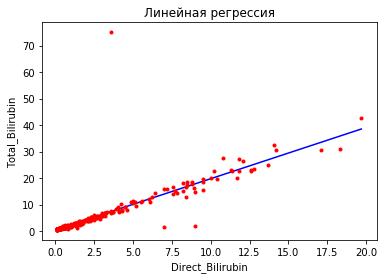

In [5]:
plt.xlabel('Direct_Bilirubin')
plt.ylabel('Total_Bilirubin')
plt.title('Линейная регрессия')
x = np.linspace(min(Direct_Bilirubin), max(Direct_Bilirubin), 100)
y = model.coef_*x + model.intercept_
plt.plot(x,y, 'b')
plt.plot(Direct_Bilirubin, Total_Bilirubin, 'r.')
plt.show()

In [7]:
model.predict(np.array([5.5, 4.1]).reshape(-1, 1))

array([11.06070443,  8.35344108])

*Ответ* 

*Значения предсказанные моделью близки к табличным*

Построить многомерную линейную регрессию для предсказания болезни (Dataset) от двух параметров. Параметры подобрать с помощью матрицы корреляций. Предсказать несколько значений из таблицы и сравнить результат модели от табличного значения.

*строим матрицу корреляции, чтобы посмотреть на какихданных есть смысл обучать нашу модель*

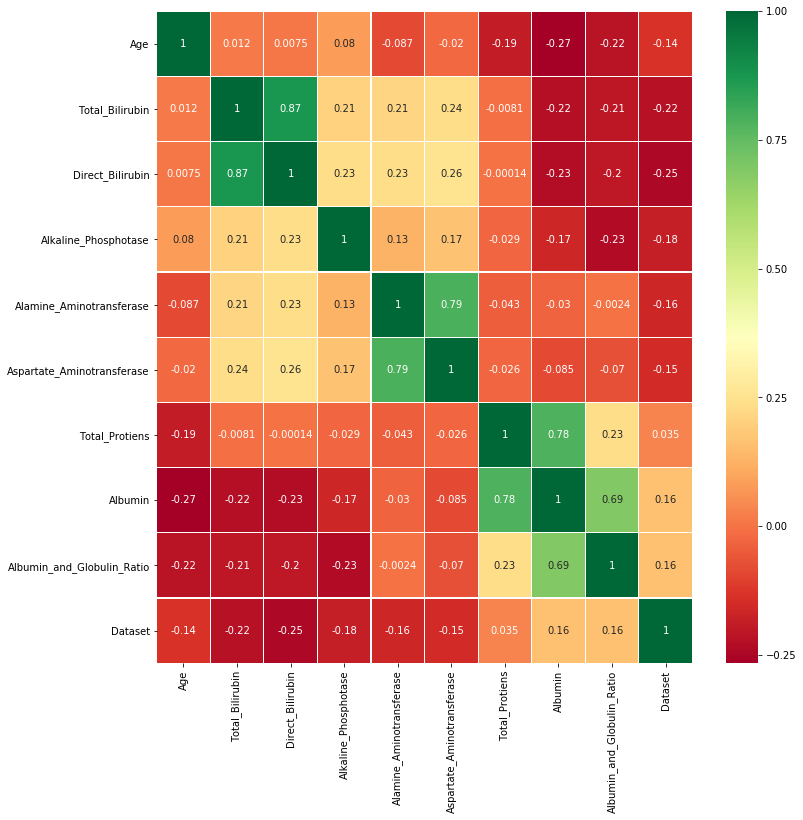

In [8]:
import seaborn as sns
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

полями которые лучше всего коррелируют с Dataset оказались:
    Direct_Bilirubin -0.25
    Alkaline_Phosphotase -0,18
конечно у Total_Bilirubin тоже вторая по силе корреляция, но он также сильно коррелирует с Direct, так что новой информации
он не принесёт
    

In [16]:
Direct_Bilirubin = data['Direct_Bilirubin']
Alkaline_Phosphotase = data['Alkaline_Phosphotase']
Dataset = data['Dataset']
x = np.vstack([np.array(Direct_Bilirubin), np.array(Alkaline_Phosphotase)]).T
print('x - это двумерная матрица, где колонки - это Direct_Bilirubin и Alkaline_Phosphotase : ')
print(x[:3])
y = np.array(Dataset)
model = LinearRegression().fit(x, y)

print('intercept:', model.intercept_)
print('slope:', model.coef_)

x - это двумерная матрица, где колонки - это Direct_Bilirubin и Alkaline_Phosphotase : 
[[1.00e-01 1.87e+02]
 [5.50e+00 6.99e+02]
 [4.10e+00 4.90e+02]]
intercept: 1.4105809528676787
slope: [-0.03455122 -0.00025048]


In [18]:
print('Предсказание модели: ', model.predict(x[:10]))

Предсказание модели:  [1.3602853  1.04546081 1.14618371 1.35117235 1.2926341  1.3342944
 1.36509615 1.34961779 1.34961779 1.33103031]


In [55]:
data['Dataset'][:10]

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    2
9    1
Name: Dataset, dtype: int64

*нет, два мало, возьмём побольше*

In [54]:
data=data.dropna() # удалил все пустые значения
Direct_Bilirubin = data['Direct_Bilirubin']
Alkaline_Phosphotase = data['Alkaline_Phosphotase']
Age = data['Age']
Alamine_Aminotransferase = data['Alamine_Aminotransferase']
Aspartate_Aminotransferase = data['Aspartate_Aminotransferase']
Albumin = data['Albumin']
Albumin_and_Globulin_Ratio = data['Albumin_and_Globulin_Ratio']
Total_Bilirubin = data['Total_Bilirubin']


Dataset = data['Dataset']
x = np.vstack([np.array(Direct_Bilirubin), np.array(Alkaline_Phosphotase), np.array(Age)\
              ,np.array(Alamine_Aminotransferase), np.array(Albumin)]).T

y = np.array(Dataset)
model = LinearRegression().fit(x, y)

print('Предсказание модели: ', model.predict(x[11:13]))

Предсказание модели:  [1.2179865  1.26917907]


In [31]:
print('Предсказание модели: ', model.predict(x[7:10]))

Предсказание модели:  [1.42508888 1.48113218 1.30691499]


Посчитать квартили для всех колонок. 

In [56]:
data.quantile([.10, .25, .50, .75], axis = 0) 

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0.10,23.0,0.7,0.1,150.0,18.0,19.0,5.1,2.0,0.546,1.0
0.25,33.0,0.8,0.2,175.5,23.0,25.0,5.8,2.6,0.700,1.0
0.50,45.0,1.0,0.3,208.0,35.0,42.0,6.6,3.1,0.930,1.0
0.75,58.0,2.6,1.3,298.0,61.0,87.0,7.2,3.8,1.100,2.0


Построить график histogram двух выборок по наличию или отсутствию болезни: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?

In [74]:
data[(data['Age']<50) & (data['Dataset']==2)].head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
15,25,Male,0.6,0.1,183,91,53,5.5,2.3,0.70,2
17,33,Male,1.6,0.5,165,15,23,7.3,3.5,0.92,2
28,20,Male,1.1,0.5,128,20,30,3.9,1.9,0.95,2
33,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2


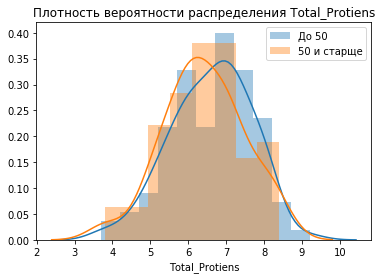

In [89]:
d2 = data[(data['Age']<50) & (data['Dataset']==2)]['Total_Protiens']
d1 = data[(data['Age']>=50) & (data['Dataset']==2)]['Total_Protiens']
sns.distplot(d2)
sns.distplot(d1)
plt.title('Плотность вероятности распределения Total_Protiens')
plt.legend(['До 50', '50 и старще'])
plt.show()


Посчитать критерий одновыборочный t-критерий для выборки по критерию Total_Bilirubin у больных людей. Как показатель помогает понять, что выборки не похожа на генеральную совокупность?

In [90]:
d2 = data[data['Dataset']==2]['Total_Bilirubin']
stats.ttest_1samp(d2, data['Total_Bilirubin'].mean())

Ttest_1sampResult(statistic=-27.615411977932315, pvalue=1.4695954513943795e-63)

*как мы видим p value значительно больше 0,05, что говорит о том, что выборка отражает генеральную совокупность*

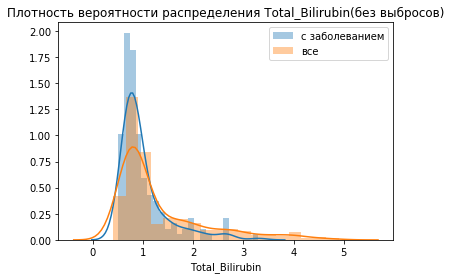

In [94]:
f_Total_Bilirubin = data[(data['Dataset']==2)&(data['Total_Bilirubin']<5)]['Total_Bilirubin']
Total_Bilirubin = data[data['Total_Bilirubin']<5]['Total_Bilirubin']
sns.distplot(f_Total_Bilirubin)
sns.distplot(Total_Bilirubin)
plt.title('Плотность вероятности распределения Total_Bilirubin(без выбросов)')
plt.legend(['с заболеванием', 'все'])
plt.show()

Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). Имеют ли данные группы схожесть?

In [100]:
d1 = data[(data['Dataset']==2)]['Total_Bilirubin']

d2 = data[(data['Dataset']==1)]['Total_Bilirubin']

stats.ttest_ind(d1, d2)

Ttest_indResult(statistic=-5.422946004172417, pvalue=8.632557516910643e-08)

*да, группы очень похожи, т.к. pvalue значительно больше 0.05*

Посчитать статистическую значимость для трех выборок (по возрасту) - 1ая группа от 1 до 30 лет, 2ая группа от 30 лет до 55, 3я группа более 55 по выборке Dataset. Сравнить с реальностью (они логично что будут отличаться).

In [107]:
restecg_0 = data[(data['Age']<=30)]['Dataset']

restecg_1 = data[(data['Age']>30)&(data['Age']<55)]['Dataset']

restecg_2 = data[(data['Age']>=55)]['Dataset']

stats.f_oneway(restecg_0, restecg_1, restecg_2)

F_onewayResult(statistic=8.421884816399071, pvalue=0.0002482448897633349)

*различия по полю Dataset присутствуют*

Вопросы задавать на почту yustiks@gmail.com